# PHYS243 Final Project
# ChiKit Ho ID# 862191050

In [155]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [206]:
#Read data
data = pd.read_csv('train_set.txt', header=None)
data.columns=['X1','X2','class']

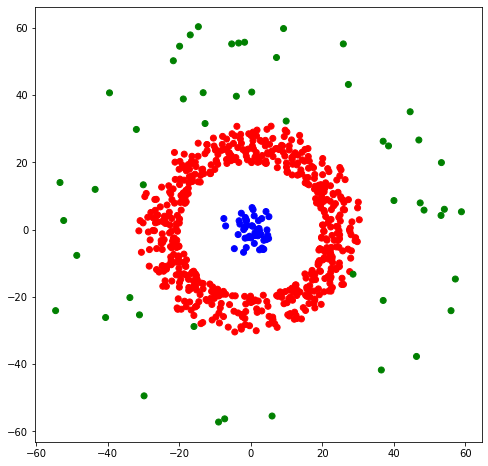

In [207]:
#Let's see how's the dataset look like
plt.figure(figsize=(8,8))
plt.scatter(data['X1'], data['X2'], c=data['class'])

In [208]:
data.head()

,X1,X2,class
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r


In [209]:
#Check the shape of the dataset
data.shape

(685, 3)

In [210]:
#Check the class
data['class'].value_counts()

r    585
b     50
g     50
Name: class, dtype: int64

In [211]:
#Check if there is any null data
data.isnull().sum()

X1       0
X2       0
class    0
dtype: int64

In [212]:
#Split the data into features and class
X_data=data.drop(columns="class")
y_data=data["class"]

In [213]:
#Since y_data is categorial, we need to change it to the numerical number
y_data=pd.get_dummies(y_data)

In [214]:
# split the data into training and testing sets in 0.7 and 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42)

In [215]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((479, 2), (206, 2), (479, 3), (206, 3))

In [239]:
#Normalization by using Standard Sacler
scaler=MinMaxScaler()

In [240]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [242]:
X_train

array([[0.59709624, 0.26000567],
       [0.50936408, 0.66769123],
       [0.29861566, 0.65734512],
       [0.53070321, 0.47221892],
       [0.4031527 , 0.3315493 ],
       [0.43411998, 0.69802553],
       [0.5767785 , 0.76129219],
       [0.40770765, 0.        ],
       [0.55418785, 0.23940225],
       [0.51572294, 0.28101593],
       [0.58430772, 0.68818442],
       [0.35119774, 0.64624811],
       [0.4740301 , 0.46508586],
       [0.71655382, 0.36371405],
       [0.55293822, 0.32008137],
       [0.32108974, 0.61179821],
       [0.40858215, 0.27568111],
       [0.97251156, 0.53819352],
       [0.36358014, 0.24887123],
       [0.62574905, 0.61796656],
       [0.34456971, 0.35704248],
       [0.31018409, 0.95059394],
       [0.27926453, 0.39464141],
       [0.92169875, 0.53606233],
       [0.71226514, 0.50840151],
       [0.53405142, 0.26724498],
       [0.73716078, 0.49114054],
       [0.2442159 , 0.51635672],
       [0.73250931, 0.56250484],
       [0.62383117, 0.68959866],
       [0.

In [219]:
#Get the number of featues and number of classes
n_features=X_data.shape[1]
n_classes=y_data.shape[1]
print("Number of features: ", n_features)
print("Number of classes: ",n_classes)

Number of features:  2
Number of classes:  3


Build the model

In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [221]:
#Modified from Abtin's notes
def create_model_network2(input_dim, output_dim, neurons, activation='relu', layers=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
                    model.add(Dense(neurons, input_dim=input_dim, activation=activation))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

In [222]:
from tensorflow.keras.callbacks import TensorBoard

def ModelFit (models, train_X, test_X, train_y, test_y):
    history_dict = {}

    # TensorBoard Callback
    cb = TensorBoard()
    
    for create_model in models:
        model = create_model()
        print('Model name:', model.name)
        history_callback = model.fit(train_X, train_y, batch_size=5, epochs=50, verbose=0, validation_data=(test_X, test_y),callbacks=[cb])
                                     
        score = model.evaluate(test_X, test_y, verbose=0)
        print('Test loss:', round(score[0],8), '    Test accuracy:', round(score[1],8))
        
        history_dict[model.name] = [history_callback, model]

In [223]:
#Also from Abtin's note
models = [create_model_network2(n_features, n_classes, 4, 'relu', i, 'model{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1381 (Dense)           (None, 4)                 12        
_________________________________________________________________
dense_1382 (Dense)           (None, 3)                 15        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1383 (Dense)           (None, 4)                 12        
_________________________________________________________________
dense_1384 (Dense)           (None, 4)                 20        
_________________________________________________________________
dense_1385 (Dense)           (None, 3)                 15        
Total params: 47
Trainable params: 47
Non-traina

In [224]:
ModelFit(models,X_train,X_test,y_train,y_test)

Model name: model1
Test loss: 0.46501583     Test accuracy: 0.87864077
Model name: model2
Test loss: 0.36262479     Test accuracy: 0.87864077
Model name: model3
Test loss: 0.33755505     Test accuracy: 0.89320385


When compared the accuracy and loss between the model. It seems model 3 has the simplest model with the best accuracy score and the fewest loss. We are going to change the activiation function, number of layers and number of neurons to find the simplest model.

#### Activiation: ReLu, Sigmoid, tanh 
#### Layer: 1 or 2
#### Neurons in each layer: 4, 8, 16, 32

In [225]:
act_func=['relu','tanh','sigmoid']
layers=[1,2]
neurons=[4,8,16,32]

In [226]:
i=1
models=list()
for activation in act_func:
    for layer in layers:
        for neuron in neurons:
            models.append(create_model_network2(n_features, n_classes, neuron, activation, layer,'model{}'.format(i)))
            print('model{} Activiation: {} Layers: {}, Neuron: {}'.format(i,activation,layer,neuron))
            i+=1

model1 Activiation: relu Layers: 1, Neuron: 4
model2 Activiation: relu Layers: 1, Neuron: 8
model3 Activiation: relu Layers: 1, Neuron: 16
model4 Activiation: relu Layers: 1, Neuron: 32
model5 Activiation: relu Layers: 2, Neuron: 4
model6 Activiation: relu Layers: 2, Neuron: 8
model7 Activiation: relu Layers: 2, Neuron: 16
model8 Activiation: relu Layers: 2, Neuron: 32
model9 Activiation: tanh Layers: 1, Neuron: 4
model10 Activiation: tanh Layers: 1, Neuron: 8
model11 Activiation: tanh Layers: 1, Neuron: 16
model12 Activiation: tanh Layers: 1, Neuron: 32
model13 Activiation: tanh Layers: 2, Neuron: 4
model14 Activiation: tanh Layers: 2, Neuron: 8
model15 Activiation: tanh Layers: 2, Neuron: 16
model16 Activiation: tanh Layers: 2, Neuron: 32
model17 Activiation: sigmoid Layers: 1, Neuron: 4
model18 Activiation: sigmoid Layers: 1, Neuron: 8
model19 Activiation: sigmoid Layers: 1, Neuron: 16
model20 Activiation: sigmoid Layers: 1, Neuron: 32
model21 Activiation: sigmoid Layers: 2, Neuron:

In [227]:
for model in models:
    model().summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1399 (Dense)           (None, 4)                 12        
_________________________________________________________________
dense_1400 (Dense)           (None, 3)                 15        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1401 (Dense)           (None, 8)                 24        
_________________________________________________________________
dense_1402 (Dense)           (None, 3)                 27        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
Model: "model3"
____________________________________

Model: "model14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1430 (Dense)           (None, 8)                 24        
_________________________________________________________________
dense_1431 (Dense)           (None, 8)                 72        
_________________________________________________________________
dense_1432 (Dense)           (None, 3)                 27        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________
Model: "model15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1433 (Dense)           (None, 16)                48        
_________________________________________________________________
dense_1434 (Dense)           (None, 16)                272       
____________________________________________

In [228]:
ModelFit(models, X_train, X_test, y_train, y_test)

Model name: model1
Test loss: 0.43164244     Test accuracy: 0.87864077
Model name: model2
Test loss: 0.44187135     Test accuracy: 0.87864077
Model name: model3
Test loss: 0.39780051     Test accuracy: 0.87864077
Model name: model4
Test loss: 0.39474946     Test accuracy: 0.87864077
Model name: model5
Test loss: 0.44708908     Test accuracy: 0.87864077
Model name: model6
Test loss: 0.38236874     Test accuracy: 0.88834953
Model name: model7
Test loss: 0.21491969     Test accuracy: 0.907767
Model name: model8
Test loss: 0.22369844     Test accuracy: 0.93203884
Model name: model9
Test loss: 0.46373239     Test accuracy: 0.87864077
Model name: model10
Test loss: 0.45509115     Test accuracy: 0.87864077
Model name: model11
Test loss: 0.45037228     Test accuracy: 0.87864077
Model name: model12
Test loss: 0.44999477     Test accuracy: 0.87864077
Model name: model13
Test loss: 0.44277495     Test accuracy: 0.87864077
Model name: model14
Test loss: 0.44064239     Test accuracy: 0.87864077
Mod

From the above table, model 8 Activiation: relu Layers: 2, Neuron: 32 has the best accuracy score.

### Build New Attributes

In [229]:
#Let's see the current data
data

,X1,X2,class
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r
...,...,...,...
680,0.244329,19.916511,r
681,22.591032,-9.133996,r
682,-21.533493,-7.396731,r
683,5.699510,30.742204,r


In [230]:
#Add X3,X4 and X5
data['X3']=data['X1']**2
data['X4']=data['X2']**2
data['X5']=data['X1']*data['X2']
data

,X1,X2,class,X3,X4,X5
0,16.263398,13.299206,r,264.498124,176.868878,216.290282
1,0.775408,23.986692,r,0.601257,575.361405,18.599466
2,29.170503,-3.287474,r,850.918251,10.807487,-95.897279
3,6.739044,-28.033329,r,45.414707,785.867535,-188.917824
4,3.216100,22.013695,r,10.343297,484.602776,70.798239
...,...,...,...,...,...,...
680,0.244329,19.916511,r,0.059697,396.667413,4.866189
681,22.591032,-9.133996,r,510.354718,83.429883,-206.346394
682,-21.533493,-7.396731,r,463.691321,54.711632,159.277458
683,5.699510,30.742204,r,32.484417,945.083090,175.215505


#### {X3, X4}

In [231]:
#Update the new feautes
X_data2=data[["X3","X4"]]
X_data2

,X3,X4
0,264.498124,176.868878
1,0.601257,575.361405
2,850.918251,10.807487
3,45.414707,785.867535
4,10.343297,484.602776
...,...,...
680,0.059697,396.667413
681,510.354718,83.429883
682,463.691321,54.711632
683,32.484417,945.083090


In [232]:
y_data

,b,g,r
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
680,0,0,1
681,0,0,1
682,0,0,1
683,0,0,1


In [233]:
# split the data into training and testing sets in 0.7 and 0.3
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data, test_size=0.3,random_state=42)

In [234]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((479, 2), (206, 2), (479, 3), (206, 3))

In [243]:
#Normalization by using MinMiax Sacler
X_train2=scaler.fit_transform(X_train2)
X_test2=scaler.transform(X_test2)
X_train2

array([[4.53644028e-02, 1.95450949e-01],
       [1.73144756e-03, 1.24184083e-01],
       [1.36931797e-01, 1.10380184e-01],
       [6.93855512e-03, 8.14284058e-04],
       [2.75045438e-02, 9.16117252e-02],
       [1.10994405e-02, 1.69342973e-01],
       [3.00333254e-02, 2.86018441e-01],
       [2.46324960e-02, 9.00215080e-01],
       [1.66857186e-02, 2.32565304e-01],
       [2.91965686e-03, 1.60924215e-01],
       [3.53472293e-02, 1.53926516e-01],
       [7.14662464e-02, 9.64781437e-02],
       [7.49949726e-04, 1.80092635e-03],
       [1.99212087e-01, 5.75960030e-02],
       [1.60610466e-02, 1.05639933e-01],
       [1.06369413e-01, 5.92792877e-02],
       [2.40992116e-02, 1.69373477e-01],
       [8.95494306e-01, 1.00064849e-02],
       [5.91192366e-02, 2.15107766e-01],
       [7.23385994e-02, 6.52773152e-02],
       [7.85560915e-02, 6.40055719e-02],
       [1.20718566e-01, 8.16705546e-01],
       [1.66335471e-01, 3.22994320e-02],
       [7.17494917e-01, 9.19280828e-03],
       [1.918041

In [244]:
#Update the number of featues and number of classes
n_features=X_train2.shape[1]
print("Number of features: ", n_features)
print("Number of classes: ",n_classes)

Number of features:  2
Number of classes:  3


In [245]:
ModelFit(models, X_train2, X_test2, y_train2, y_test2)

Model name: model1
Test loss: 0.29339686     Test accuracy: 0.92233008
Model name: model2
Test loss: 0.24051836     Test accuracy: 0.9174757
Model name: model3
Test loss: 0.11914662     Test accuracy: 0.92718446
Model name: model4
Test loss: 0.04010021     Test accuracy: 0.99514562
Model name: model5
Test loss: 0.26840085     Test accuracy: 0.92718446
Model name: model6
Test loss: 0.07498299     Test accuracy: 0.99514562
Model name: model7
Test loss: 0.01692015     Test accuracy: 0.99514562
Model name: model8
Test loss: 0.01142309     Test accuracy: 0.99514562
Model name: model9
Test loss: 0.1971734     Test accuracy: 0.9174757
Model name: model10
Test loss: 0.09008441     Test accuracy: 0.99029124
Model name: model11
Test loss: 0.05756155     Test accuracy: 0.99514562
Model name: model12
Test loss: 0.02899824     Test accuracy: 0.99514562
Model name: model13
Test loss: 0.04463942     Test accuracy: 0.99514562
Model name: model14
Test loss: 0.01576233     Test accuracy: 0.99514562
Mode

From the above table, model4 Activiation: relu Layers: 1, Neuron: 32 <br>
model6 Activiation: relu Layers: 2, Neuron: 8 <br>
model11 Activiation: tanh Layers: 1, Neuron: 16 <br>
have the similiar accraucy score and loss. 
To find the simplies, I will sugest model 11, with activiation function of tanh, 1 layer and 16 neurons.

#### {X3, X5}

In [246]:
#Update the new feautes
X_data3=data[["X3","X5"]]
X_data3

,X3,X5
0,264.498124,216.290282
1,0.601257,18.599466
2,850.918251,-95.897279
3,45.414707,-188.917824
4,10.343297,70.798239
...,...,...
680,0.059697,4.866189
681,510.354718,-206.346394
682,463.691321,159.277458
683,32.484417,175.215505


In [247]:
# split the data into training and testing sets in 0.7 and 0.3
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data3, y_data, test_size=0.3,random_state=42)

In [248]:
#Normalization by using MinMiax Sacler
X_train3=scaler.fit_transform(X_train3)
X_test3=scaler.transform(X_test3)

In [249]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((479, 2), (206, 2), (479, 3), (206, 3))

In [250]:
X_train3

array([[4.53644028e-02, 4.30123925e-01],
       [1.73144756e-03, 5.43577219e-01],
       [1.36931797e-01, 4.00122621e-01],
       [6.93855512e-03, 5.25809036e-01],
       [2.75045438e-02, 5.80617649e-01],
       [1.10994405e-02, 4.83089374e-01],
       [3.00333254e-02, 6.24908801e-01],
       [2.46324960e-02, 6.83527262e-01],
       [1.66857186e-02, 4.63345514e-01],
       [2.91965686e-03, 5.05687565e-01],
       [3.53472293e-02, 6.05184182e-01],
       [7.14662464e-02, 4.41723417e-01],
       [7.49949726e-04, 5.29499523e-01],
       [1.99212087e-01, 4.16620389e-01],
       [1.60610466e-02, 4.85345450e-01],
       [1.06369413e-01, 4.45506227e-01],
       [2.40992116e-02, 5.94891355e-01],
       [8.95494306e-01, 6.26970815e-01],
       [5.91192366e-02, 6.45848702e-01],
       [7.23385994e-02, 5.99924456e-01],
       [7.85560915e-02, 6.02208804e-01],
       [1.20718566e-01, 2.00953828e-01],
       [1.66335471e-01, 6.04699227e-01],
       [7.17494917e-01, 6.12952757e-01],
       [1.918041

In [251]:
#Update the number of featues and number of classes
n_features=X_train3.shape[1]
print("Number of features: ", n_features)
print("Number of classes: ",n_classes)

Number of features:  2
Number of classes:  3


In [252]:
ModelFit(models, X_train3, X_test3, y_train3, y_test3)

Model name: model1
Test loss: 0.45731887     Test accuracy: 0.87864077
Model name: model2
Test loss: 0.34939164     Test accuracy: 0.88834953
Model name: model3
Test loss: 0.35112351     Test accuracy: 0.88834953
Model name: model4
Test loss: 0.30382141     Test accuracy: 0.89320385
Model name: model5
Test loss: 0.29403895     Test accuracy: 0.89805824
Model name: model6
Test loss: 0.32253391     Test accuracy: 0.89320385
Model name: model7
Test loss: 0.27916694     Test accuracy: 0.89320385
Model name: model8
Test loss: 0.26003546     Test accuracy: 0.89805824
Model name: model9
Test loss: 0.39708343     Test accuracy: 0.88834953
Model name: model10
Test loss: 0.34016192     Test accuracy: 0.88834953
Model name: model11
Test loss: 0.3248902     Test accuracy: 0.88834953
Model name: model12
Test loss: 0.31487629     Test accuracy: 0.88834953
Model name: model13
Test loss: 0.31432253     Test accuracy: 0.88834953
Model name: model14
Test loss: 0.29068381     Test accuracy: 0.89320385
Mo

From the above table, model16 Activiation: tanh Layers: 2, Neuron: 32 has the highest accuracy score

#### {X3, X4, X5}

In [253]:
#Update the new feautes
X_data4=data[["X3","X4","X5"]]
X_data4

,X3,X4,X5
0,264.498124,176.868878,216.290282
1,0.601257,575.361405,18.599466
2,850.918251,10.807487,-95.897279
3,45.414707,785.867535,-188.917824
4,10.343297,484.602776,70.798239
...,...,...,...
680,0.059697,396.667413,4.866189
681,510.354718,83.429883,-206.346394
682,463.691321,54.711632,159.277458
683,32.484417,945.083090,175.215505


In [254]:
# split the data into training and testing sets in 0.7 and 0.3
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_data4, y_data, test_size=0.3,random_state=42)

In [255]:
#Normalization by using MinMiax Sacler
X_train4=scaler.fit_transform(X_train4)
X_test4=scaler.transform(X_test4)

In [256]:
X_train4

array([[0.0453644 , 0.19545095, 0.43012392],
       [0.00173145, 0.12418408, 0.54357722],
       [0.1369318 , 0.11038018, 0.40012262],
       ...,
       [0.00321076, 0.00186781, 0.52573399],
       [0.00516977, 0.19334588, 0.56124869],
       [0.00919977, 0.11538337, 0.49432104]])

In [257]:
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

((479, 3), (206, 3), (479, 3), (206, 3))

In [258]:
#Update the number of featues and number of classes
n_features=X_train4.shape[1]
print("Number of features: ", n_features)
print("Number of classes: ",n_classes)

Number of features:  3
Number of classes:  3


In [259]:
i=1
models2=list()
for activation in act_func:
    for layer in layers:
        for neuron in neurons:
            models2.append(create_model_network2(n_features, n_classes, neuron, activation, layer,'model{}'.format(i)))
            print('model{} Activiation: {} Layers: {}, Neuron: {}'.format(i,activation,layer,neuron))
            i+=1

model1 Activiation: relu Layers: 1, Neuron: 4
model2 Activiation: relu Layers: 1, Neuron: 8
model3 Activiation: relu Layers: 1, Neuron: 16
model4 Activiation: relu Layers: 1, Neuron: 32
model5 Activiation: relu Layers: 2, Neuron: 4
model6 Activiation: relu Layers: 2, Neuron: 8
model7 Activiation: relu Layers: 2, Neuron: 16
model8 Activiation: relu Layers: 2, Neuron: 32
model9 Activiation: tanh Layers: 1, Neuron: 4
model10 Activiation: tanh Layers: 1, Neuron: 8
model11 Activiation: tanh Layers: 1, Neuron: 16
model12 Activiation: tanh Layers: 1, Neuron: 32
model13 Activiation: tanh Layers: 2, Neuron: 4
model14 Activiation: tanh Layers: 2, Neuron: 8
model15 Activiation: tanh Layers: 2, Neuron: 16
model16 Activiation: tanh Layers: 2, Neuron: 32
model17 Activiation: sigmoid Layers: 1, Neuron: 4
model18 Activiation: sigmoid Layers: 1, Neuron: 8
model19 Activiation: sigmoid Layers: 1, Neuron: 16
model20 Activiation: sigmoid Layers: 1, Neuron: 32
model21 Activiation: sigmoid Layers: 2, Neuron:

In [260]:
ModelFit(models2, X_train4, X_test4, y_train4, y_test4)

Model name: model1
Test loss: 0.25101912     Test accuracy: 0.91262138
Model name: model2
Test loss: 0.13359839     Test accuracy: 0.92233008
Model name: model3
Test loss: 0.09658256     Test accuracy: 0.98058254
Model name: model4
Test loss: 0.02510954     Test accuracy: 0.99514562
Model name: model5
Test loss: 0.32188708     Test accuracy: 0.91262138
Model name: model6
Test loss: 0.02323258     Test accuracy: 0.99514562
Model name: model7
Test loss: 0.01211671     Test accuracy: 0.99514562
Model name: model8
Test loss: 0.00879038     Test accuracy: 1.0
Model name: model9
Test loss: 0.14121714     Test accuracy: 0.9174757
Model name: model10
Test loss: 0.0751815     Test accuracy: 0.99029124
Model name: model11
Test loss: 0.04305752     Test accuracy: 0.99029124
Model name: model12
Test loss: 0.0286945     Test accuracy: 0.99514562
Model name: model13
Test loss: 0.10228515     Test accuracy: 0.99514562
Model name: model14
Test loss: 0.0153279     Test accuracy: 0.99514562
Model name: 

From the above table, model3 Activiation: relu Layers: 1, Neuron: 16 is the simplest model with a good accuracy score

#### {X1, X2, X3, X4, X5}

In [261]:
#Update the new feautes
X_data5=data.drop(columns="class")
X_data5

,X1,X2,X3,X4,X5
0,16.263398,13.299206,264.498124,176.868878,216.290282
1,0.775408,23.986692,0.601257,575.361405,18.599466
2,29.170503,-3.287474,850.918251,10.807487,-95.897279
3,6.739044,-28.033329,45.414707,785.867535,-188.917824
4,3.216100,22.013695,10.343297,484.602776,70.798239
...,...,...,...,...,...
680,0.244329,19.916511,0.059697,396.667413,4.866189
681,22.591032,-9.133996,510.354718,83.429883,-206.346394
682,-21.533493,-7.396731,463.691321,54.711632,159.277458
683,5.699510,30.742204,32.484417,945.083090,175.215505


In [262]:
# split the data into training and testing sets in 0.7 and 0.3
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_data5, y_data, test_size=0.3,random_state=42)

In [263]:
#Normalization by using MinMiax Sacler
X_train5=scaler.fit_transform(X_train5)
X_test5=scaler.transform(X_test5)
X_train5

array([[0.59709624, 0.26000567, 0.0453644 , 0.19545095, 0.43012392],
       [0.50936408, 0.66769123, 0.00173145, 0.12418408, 0.54357722],
       [0.29861566, 0.65734512, 0.1369318 , 0.11038018, 0.40012262],
       ...,
       [0.45904499, 0.50904046, 0.00321076, 0.00186781, 0.52573399],
       [0.52486905, 0.71249502, 0.00516977, 0.19334588, 0.56124869],
       [0.43895172, 0.66116601, 0.00919977, 0.11538337, 0.49432104]])

In [264]:
X_train5.shape, X_test5.shape, y_train5.shape, y_test5.shape

((479, 5), (206, 5), (479, 3), (206, 3))

In [265]:
#Update the number of featues and number of classes
n_features=X_train5.shape[1]
print("Number of features: ", n_features)
print("Number of classes: ",n_classes)

Number of features:  5
Number of classes:  3


In [266]:
i=1
models3=list()
for activation in act_func:
    for layer in layers:
        for neuron in neurons:
            models3.append(create_model_network2(n_features, n_classes, neuron, activation, layer,'model{}'.format(i)))
            print('model{} Activiation: {} Layers: {}, Neuron: {}'.format(i,activation,layer,neuron))
            i+=1

model1 Activiation: relu Layers: 1, Neuron: 4
model2 Activiation: relu Layers: 1, Neuron: 8
model3 Activiation: relu Layers: 1, Neuron: 16
model4 Activiation: relu Layers: 1, Neuron: 32
model5 Activiation: relu Layers: 2, Neuron: 4
model6 Activiation: relu Layers: 2, Neuron: 8
model7 Activiation: relu Layers: 2, Neuron: 16
model8 Activiation: relu Layers: 2, Neuron: 32
model9 Activiation: tanh Layers: 1, Neuron: 4
model10 Activiation: tanh Layers: 1, Neuron: 8
model11 Activiation: tanh Layers: 1, Neuron: 16
model12 Activiation: tanh Layers: 1, Neuron: 32
model13 Activiation: tanh Layers: 2, Neuron: 4
model14 Activiation: tanh Layers: 2, Neuron: 8
model15 Activiation: tanh Layers: 2, Neuron: 16
model16 Activiation: tanh Layers: 2, Neuron: 32
model17 Activiation: sigmoid Layers: 1, Neuron: 4
model18 Activiation: sigmoid Layers: 1, Neuron: 8
model19 Activiation: sigmoid Layers: 1, Neuron: 16
model20 Activiation: sigmoid Layers: 1, Neuron: 32
model21 Activiation: sigmoid Layers: 2, Neuron:

In [267]:
ModelFit(models3, X_train5, X_test5, y_train5, y_test5)

Model name: model1
Test loss: 0.24989066     Test accuracy: 0.91262138
Model name: model2
Test loss: 0.1169505     Test accuracy: 0.96601939
Model name: model3
Test loss: 0.05510349     Test accuracy: 0.99514562
Model name: model4
Test loss: 0.03767543     Test accuracy: 0.99514562
Model name: model5
Test loss: 0.06308437     Test accuracy: 0.99514562
Model name: model6
Test loss: 0.05413192     Test accuracy: 0.99514562
Model name: model7
Test loss: 0.01364616     Test accuracy: 0.99514562
Model name: model8
Test loss: 0.01099937     Test accuracy: 0.99514562
Model name: model9
Test loss: 0.14911337     Test accuracy: 0.92233008
Model name: model10
Test loss: 0.07188632     Test accuracy: 0.99029124
Model name: model11
Test loss: 0.04973895     Test accuracy: 0.99514562
Model name: model12
Test loss: 0.0285144     Test accuracy: 0.99514562
Model name: model13
Test loss: 0.2446121     Test accuracy: 0.92718446
Model name: model14
Test loss: 0.0145577     Test accuracy: 0.99514562
Model

From the above table, model3 Activiation: relu Layers: 1, Neuron: 16 <br>
model11 Activiation: tanh Layers: 1, Neuron: 16 are the simpliest models

### Predicting heart attack

In [2]:
#Read data
heart_data = pd.read_csv('https://raw.githubusercontent.com/abtinshahidi/Foundation_applied_machine_learning/master/final/data_HA.csv', header=15)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [4]:
#Check missing data
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart_data.target.value_counts()

1    150
2    120
Name: target, dtype: int64

We have 150 people with less chance of heart attack and 120 people with higher chance of heart attack. So out target classs is balanced.

Attribute Information<br>
1) age <br>
2) sex <br>
3) chest pain type (4 values) <br>
4) resting blood pressure<br>
5) serum cholestoral in mg/dl<br>
6) fasting blood sugar > 120 mg/dl<br>
7) resting electrocardiographic results (values 0,1,2)<br>
8) maximum heart rate achieved<br>
9) exercise induced angina<br>
10) oldpeak = ST depression induced by exercise relative to rest<br>
11) the slope of the peak exercise ST segment<br>
12) number of major vessels (0-3) colored by flourosopy<br>
13) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
14) target: 1= less chance of heart attack 2= more chance of heart attack

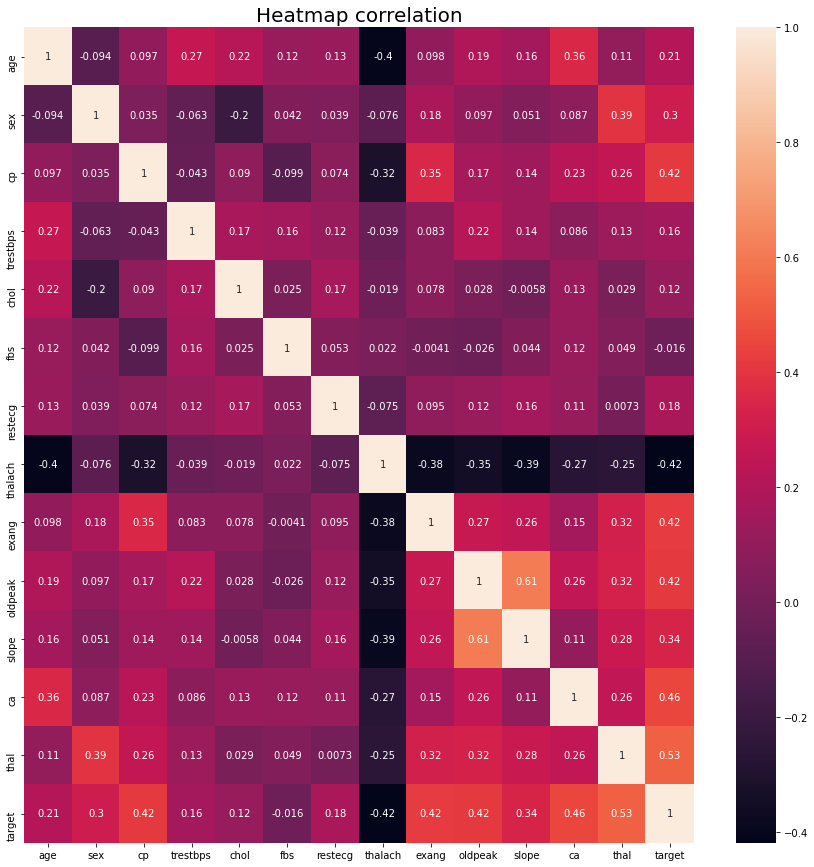

In [6]:
#Check if the features are corelated withc each other
heart_corr=heart_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(heart_corr,annot=True)
plt.title('Heatmap correlation',fontsize=20)
plt.show()

In [7]:
heart_data[heart_data.columns[1:]].corr()['target'][:]

sex         0.297721
cp          0.417436
trestbps    0.155383
chol        0.118021
fbs        -0.016319
restecg     0.182091
thalach    -0.418514
exang       0.419303
oldpeak     0.417967
slope       0.337616
ca          0.455336
thal        0.525020
target      1.000000
Name: target, dtype: float64

As we can see from the table above, fbs is has the lowest correlation with target. The rest of the features have a significant correlation with target.

In [8]:
#Data processing
#Drop fbs because it is the least related with the target
heart_data=heart_data.drop('fbs',axis=1)

In [9]:
#Next, we will use get_dummies() for one-hot encoding for the following categorical variable feature
#sex,cp,restecg,exang,slope,ca,thal
heart_data_dummies = pd.get_dummies(heart_data, columns = ["sex","cp","restecg","exang","slope","ca","thal"])

In [10]:
#We use the label Encoder function from sklearn to change the target feature from '1','2' to '0','1'
#Now '0' means less change of heart attack while '1' means more change of heart attack 
le=LabelEncoder()
heart_data_dummies['target']=le.fit_transform(heart_data_dummies['target'])

In [11]:
heart_data_dummies.target.value_counts()

0    150
1    120
Name: target, dtype: int64

In [26]:
#Split the data
X=heart_data_dummies.drop('target',axis=1)
y=heart_data_dummies['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [27]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,70,130,322,109,2.4,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,67,115,564,160,1.6,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,57,124,261,141,0.3,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,64,128,263,105,0.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,74,120,269,121,0.2,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,172,199,162,0.5,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
266,44,120,263,173,0.0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
267,56,140,294,153,1.3,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
268,57,140,192,148,0.4,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Normalization<br>
For the features,'age','trestbps','chol','thalach','oldpeak'<br>
We will do the normalization, but before the process the normalization<br>
Let's see the distribution of each features

Text(0.5, 1.0, 'oldpeak')

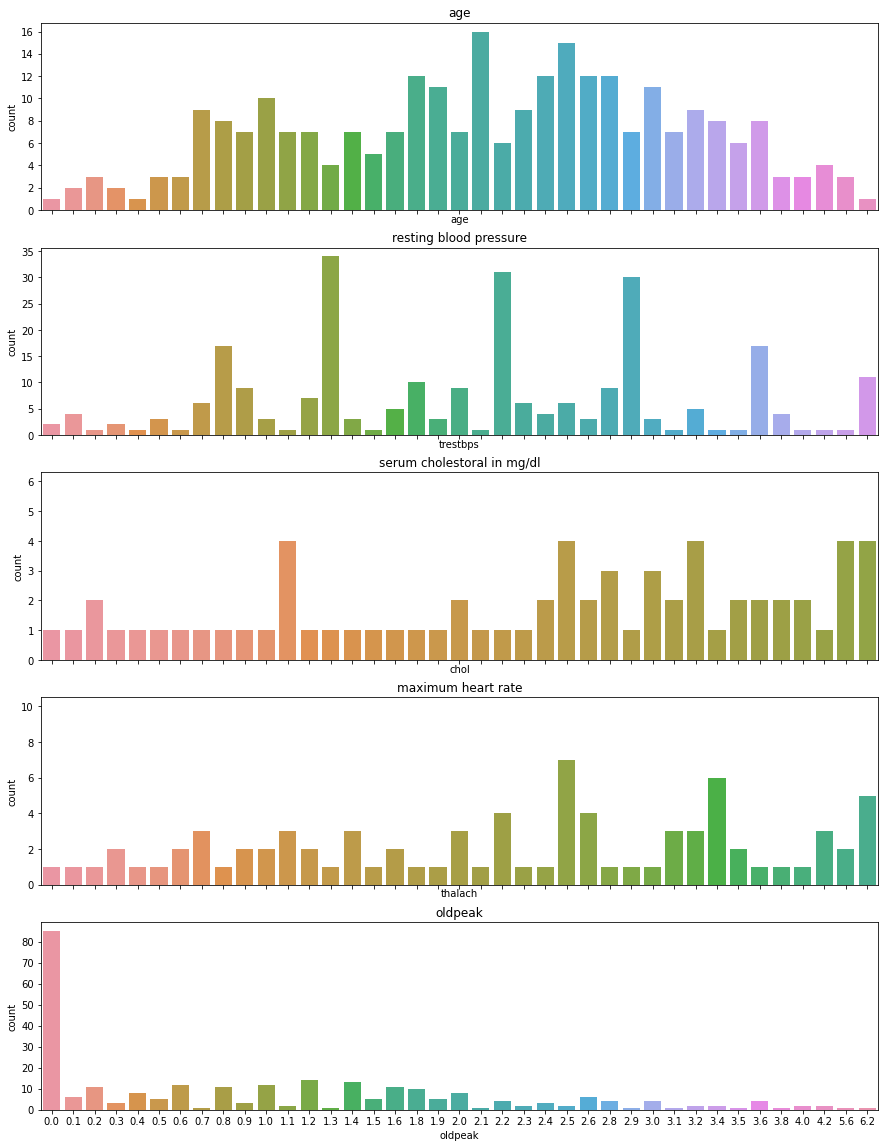

In [23]:
#Distribution of the features,'age','trestbps','chol','thalach' and 'oldpeak'
fig,axes=plt.subplots(5,1,sharex=True,figsize=(15,20))
#age
sns.countplot(x="age",data=X,ax=axes[0])
axes[0].set_title("age")
#trestbps
sns.countplot(x="trestbps",data=X,ax=axes[1])
axes[1].set_title("resting blood pressure")
#chol
sns.countplot(x="chol",data=X,ax=axes[2])
axes[2].set_title("serum cholestoral in mg/dl")
#thalach
sns.countplot(x="thalach",data=X,ax=axes[3])
axes[3].set_title("maximum heart rate")
#oldpeak
sns.countplot(x="oldpeak",data=X,ax=axes[4])
axes[4].set_title("oldpeak")

Since the features are not normally distributed, we will do the Min-Max normalziation 

In [28]:
#Min-Max Normalization
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

Build the model

In [70]:
#Since it is binary classificiton, we will first build a SVM model
from sklearn import svm
#SVM models with different parameters
svm_clf1=svm.SVC() #default: kernel=rbf,gamma=scale
svm_clf2=svm.SVC(kernel='sigmoid') #kernel=sigmoid, gamma=scale
svm_clf3=svm.SVC(kernel='linear') #kernel=linear
svm_clf4=svm.SVC(kernel='poly') #kernel=poly, degree=3, gamma=scale
svm_clf5=svm.SVC(kernel='poly', degree=2) #kernel=poly, degree=2, gamma=scale
svm_clf6=svm.SVC(gamma='auto') #kernel=rbf, gamma=auto
svm_clf7=svm.SVC(kernel='sigmoid', gamma='auto') #kernel=sigmoid, gamma=auto
svm_clf8=svm.SVC(kernel='poly', gamma='auto') #kernel=poly,degree=3, gamma=scale
svm_clf9=svm.SVC(kernel='poly', degree=2, gamma='auto') #kernel=poly, degree=2, gamma=scale

In [117]:
svm_clf1.fit(X_train_scaled, y_train)
svm_clf2.fit(X_train_scaled, y_train)
svm_clf3.fit(X_train_scaled, y_train)
svm_clf4.fit(X_train_scaled, y_train)
svm_clf5.fit(X_train_scaled, y_train)
svm_clf6.fit(X_train_scaled, y_train)
svm_clf7.fit(X_train_scaled, y_train)
svm_clf8.fit(X_train_scaled, y_train)
svm_clf9.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
y_pred_svm1=svm_clf1.predict(X_test_scaled)
y_pred_svm2=svm_clf2.predict(X_test_scaled)
y_pred_svm3=svm_clf3.predict(X_test_scaled)
y_pred_svm4=svm_clf4.predict(X_test_scaled)
y_pred_svm5=svm_clf5.predict(X_test_scaled)
y_pred_svm6=svm_clf6.predict(X_test_scaled)
y_pred_svm7=svm_clf7.predict(X_test_scaled)
y_pred_svm8=svm_clf8.predict(X_test_scaled)
y_pred_svm9=svm_clf9.predict(X_test_scaled)

In [119]:
print("SVM1:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_svm1))
print("SVM2:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_svm2))
print("SVM3:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_svm3))
print("SVM4:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_svm4))
print("SVM5:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_svm5))
print("SVM6:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_svm6))
print("SVM7:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_svm7))
print("SVM8:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_svm8))
print("SVM9:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_svm9))

SVM1:The accuracy of the predictions on the test set is = 0.7901234567901234
SVM2:The accuracy of the predictions on the test set is = 0.8024691358024691
SVM3:The accuracy of the predictions on the test set is = 0.8148148148148148
SVM4:The accuracy of the predictions on the test set is = 0.8024691358024691
SVM5:The accuracy of the predictions on the test set is = 0.8148148148148148
SVM6:The accuracy of the predictions on the test set is = 0.8271604938271605
SVM7:The accuracy of the predictions on the test set is = 0.8271604938271605
SVM8:The accuracy of the predictions on the test set is = 0.5802469135802469
SVM9:The accuracy of the predictions on the test set is = 0.8148148148148148


SVM7: sigmoid kernel with gamma = 1/n_features has the best accuracy score of 0.827

In [122]:
print(classification_report(y_test,y_pred_svm7))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        45
           1       0.87      0.72      0.79        36

    accuracy                           0.83        81
   macro avg       0.84      0.82      0.82        81
weighted avg       0.83      0.83      0.82        81



In [123]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier() #criterion=gini
rfc2=RandomForestClassifier(criterion='entropy') #criterion=entropy

In [124]:
rfc1.fit(X_train_scaled,y_train)
rfc2.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
y_pred_rfc1=rfc1.predict(X_test_scaled)
y_pred_rfc2=rfc2.predict(X_test_scaled)

In [126]:
print("rfc1:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_rfc1))
print("rfc2:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_rfc2))

rfc1:The accuracy of the predictions on the test set is = 0.7407407407407407
rfc2:The accuracy of the predictions on the test set is = 0.7901234567901234


In [ ]:
rfc2: using cross-entropy cost has the better accurarcy score = 0.79

In [127]:
print(classification_report(y_test,y_pred_rfc2))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        45
           1       0.83      0.67      0.74        36

    accuracy                           0.79        81
   macro avg       0.80      0.78      0.78        81
weighted avg       0.80      0.79      0.79        81



In [138]:
#KNN n_neighobr=2
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=2) #p=2 (euclidean_dist), metric default=minkowski
knn2=KNeighborsClassifier(n_neighbors=2,p=1) #p=1 (manhattan_dist), metric default=minkowski
knn3=KNeighborsClassifier(n_neighbors=2,p=3) #p=3 (minkowski_dist), metric default=minkowski

In [139]:
knn1.fit(X_train_scaled,y_train)
knn2.fit(X_train_scaled,y_train)
knn3.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=3,
                     weights='uniform')

In [140]:
y_pred_knn1=knn1.predict(X_test_scaled)
y_pred_knn2=knn2.predict(X_test_scaled)
y_pred_knn3=knn3.predict(X_test_scaled)

In [141]:
print("knn1:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_knn1))
print("knn2:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_knn2))
print("knn3:The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_knn3))

knn1:The accuracy of the predictions on the test set is = 0.7777777777777778
knn2:The accuracy of the predictions on the test set is = 0.7777777777777778
knn3:The accuracy of the predictions on the test set is = 0.7777777777777778


In [86]:
knn2, p=1 has the best accuracy score of 0.78

array([0, 1], dtype=int64)

In [136]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='ovr')
lr.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
y_pred_lr=lr.predict(X_test_scaled)
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred_lr))

The accuracy of the predictions on the test set is = 0.8148148148148148


We will use the SVM for the 3-fold cross-validation

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scores=[]
best_model=svm.SVC(kernel='sigmoid', gamma='auto') #kernel=sigmoid, gamma=auto
cv=KFold(n_splits=3,shuffle=True,random_state=42)

In [149]:
X_scaled=minmaxscaler.fit_transform(X)

In [153]:
for train_index, test_index in cv.split(X):
    X_train=X_scaled[train_index]  
    X_test=X_scaled[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    best_model.fit(X_train,y_train)
    scores.append(best_model.score(X_test,y_test))

In [154]:
scores

[0.8333333333333334, 0.8555555555555555, 0.8333333333333334]

In [155]:
#We can also use the cross_val_score function for the 3-fold cross validation
cross_val_score(best_model,X_scaled,y,cv=3)

array([0.81111111, 0.88888889, 0.82222222])

Conclusion: The SVM with kernel of sigmoid and 1/n_features as gamma can build a model with accruacy score between 0.83 to 0.85, which is a good number.